# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Load Data

In [2]:
#loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Subset 0,1

In [3]:
# subsetting for classes 0,1 only

x_train = x_train[np.logical_or(y_train == 0, y_train == 1)]
y_train = y_train[np.logical_or(y_train == 0, y_train == 1)]

x_test = x_test[np.logical_or(y_test == 0, y_test == 1)]
y_test = y_test[np.logical_or(y_test == 0, y_test == 1)]

In [4]:
np.unique(y_train), np.unique(y_test)

(array([0, 1], dtype=uint8), array([0, 1], dtype=uint8))

# Flatten Data

In [5]:
x_train=x_train.reshape(len(x_train),-1)
x_test=x_test.reshape(len(x_test),-1)

# Standardize Data

In [6]:
x_train=(x_train-np.mean(x_train,axis=0))/(np.std(x_train,axis=0)+10e-16)
x_test=(x_test-np.mean(x_test,axis=0))/(np.std(x_test,axis=0)+10e-16)

# Sigmoid Function

In [7]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Cost Function

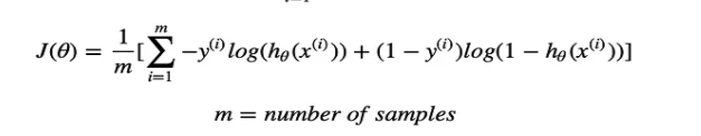

In [8]:
def cost_function(phiz, y_train):
    return (y_train * np.log(phiz) - (1 - y_train) * np.log(1 - phiz)).mean()

# Initialize Parameters


*  np.random.rand() generates random numbers from a uniform distribution.

*   
np.random.randn() generates random numbers from a standard normal distribution.

*   np.random.randint() generates random integers within a specified range.












In [9]:
w=np.random.rand(784)
b=np.random.rand(1)

In [10]:
w

array([0.84961246, 0.33237096, 0.53332657, 0.20988113, 0.44700446,
       0.98507563, 0.13287272, 0.70118792, 0.43134656, 0.1382715 ,
       0.84201866, 0.08427178, 0.3611444 , 0.84668703, 0.27935391,
       0.04056609, 0.45274265, 0.95152566, 0.02002253, 0.6449522 ,
       0.34736412, 0.24183715, 0.95830652, 0.32799786, 0.42566228,
       0.08651458, 0.52253009, 0.19424886, 0.52423564, 0.15568524,
       0.21731669, 0.58091689, 0.32546862, 0.9359548 , 0.80251216,
       0.96639337, 0.89380274, 0.54518509, 0.33046752, 0.45743449,
       0.68613697, 0.53281595, 0.65655881, 0.87886279, 0.3928504 ,
       0.47403216, 0.56911967, 0.29174427, 0.5230192 , 0.94890132,
       0.45495427, 0.91005895, 0.36280966, 0.64070274, 0.90849886,
       0.8704444 , 0.2836473 , 0.02887922, 0.08092373, 0.45594064,
       0.53674178, 0.45154419, 0.35500337, 0.30478176, 0.49044174,
       0.76923563, 0.93991647, 0.60009567, 0.543345  , 0.46912489,
       0.24174927, 0.83248486, 0.22331788, 0.00925649, 0.13060

In [11]:
w.shape

(784,)

In [12]:
x_train.shape

(12665, 784)

In [13]:
epochs=1000
tolerance = 10e-8
Cost=np.zeros(epochs)
eta=0.1

# Gradient Descent Function

In [14]:
def Gradient_Descent(X_train,Y_train,w,b,epochs,eta):
    for i in range (epochs):
          z=np.dot(x_train,w.T)+b
          phiZ = sigmoid(z)
          Cost[i] =cost_function(phiZ, y_train)
          w = w - (eta * np.dot((phiZ - y_train).T , x_train)) /len(x_train)
          b = b - eta * np.mean(phiZ - y_train)
          if (Cost[i]<tolerance):
            break;
    return w,b

In [15]:
w,b=Gradient_Descent(x_train,y_train,w,b,epochs,eta)

# Test Data

In [16]:
# Test with same data and look at the accuracy
z=np.dot(x_test,w)+b
y_pred =sigmoid(z)
for i in range(len(y_pred)):
  if (y_pred[i]>0.5):   #Threshhold
     y_pred[i]=1
  else:
     y_pred[i]=0


accuracy=np.mean(np.equal(y_pred, y_test))*100

In [17]:
accuracy

99.76359338061465

# Confusion_Matrix

In [18]:
con_matrix=confusion_matrix(y_test,y_pred)

Text(0.5, 23.52222222222222, 'Predicted')

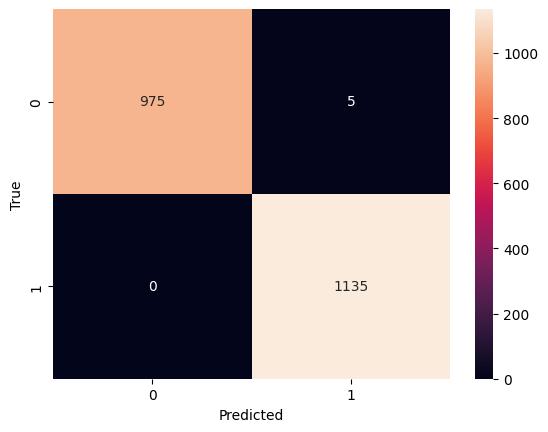

In [19]:
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

#Classification_Report

In [20]:
CR=classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115

